1.DATA VISUALIZATION

A.AVERAGE TIME SPENT PER COURSE

C:\Users\theja\AppData\Local\Temp\ipykernel_22372\2634061378.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_engagement.values, y=course_engagement.index, palette='Blues_d')


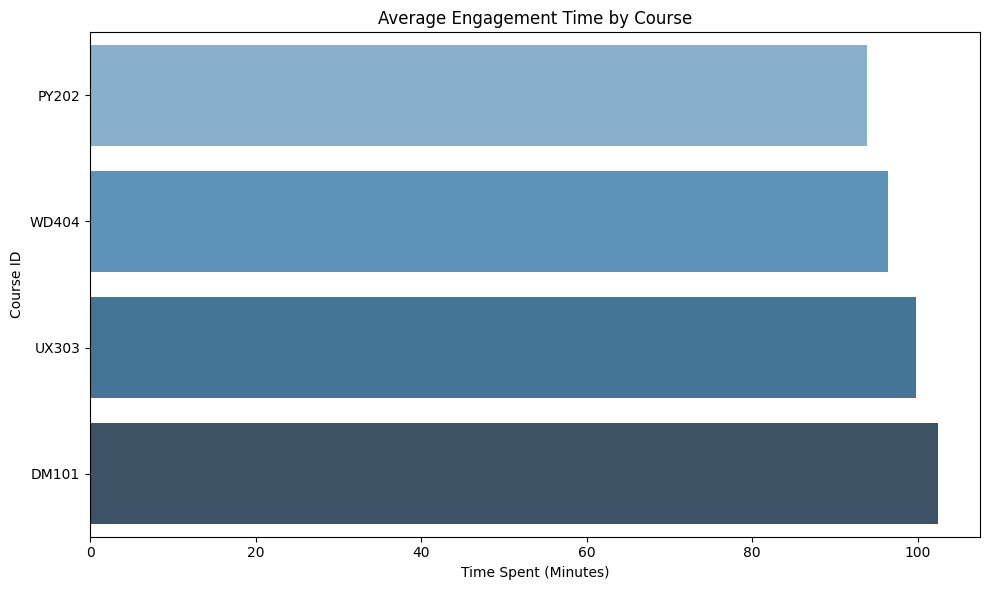

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Average Time Spent per Course
activity_df = pd.read_csv(r'C:\Users\theja\Desktop\SOHAN K\NEW ASSESMENT DA\course_activity.csv')
course_engagement = activity_df.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=course_engagement.values, y=course_engagement.index, palette='Blues_d')
plt.title("Average Engagement Time by Course")
plt.xlabel("Time Spent (Minutes)")
plt.ylabel("Course ID")
plt.tight_layout()
plt.show()


B.AVERAGE FEEDBACKRATING PER COURSE

C:\Users\theja\AppData\Local\Temp\ipykernel_22372\3672199294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='coolwarm')


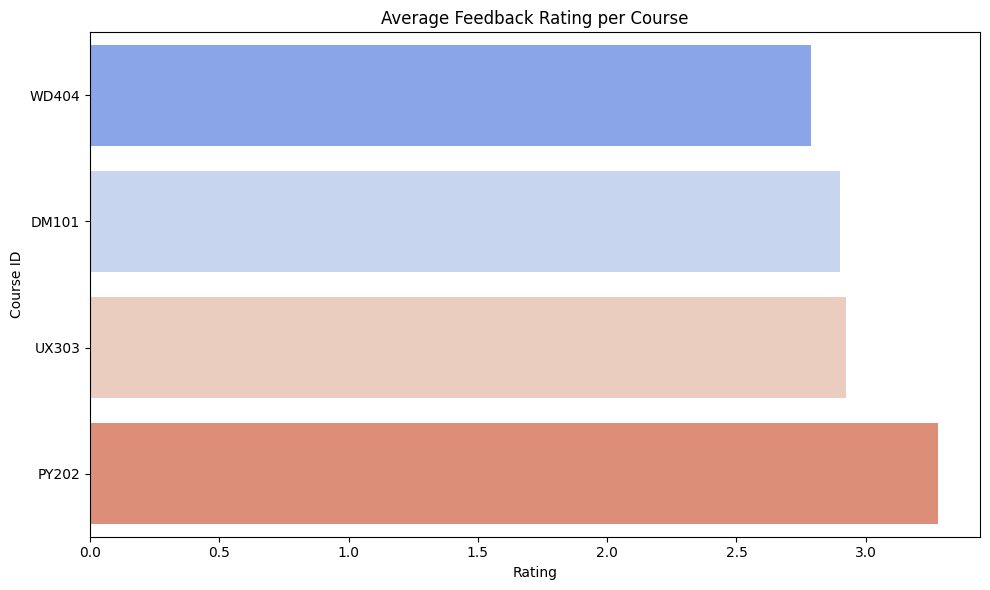

In [ ]:
feedback_df = pd.read_csv(r'C:\Users\theja\Desktop\SOHAN K\NEW ASSESMENT DA\feedback.csv')
avg_rating = feedback_df.groupby('Course_ID')['Rating'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='coolwarm')
plt.title("Average Feedback Rating per Course")
plt.xlabel("Rating")
plt.ylabel("Course ID")
plt.tight_layout()
plt.show()


C.ENGAGEMENT TIME BY AGE GROUP

In [6]:
# Create Age Group column
students_df = pd.read_csv(r'C:\Users\theja\Desktop\SOHAN K\NEW ASSESMENT DA\students.csv')
course_df = pd.read_csv(r'C:\Users\theja\Desktop\SOHAN K\NEW ASSESMENT DA\course_activity.csv')
merged_df = pd.merge(course_df, students_df, on='Student_ID')
merged_df['Age_Group'] = pd.cut(
    merged_df['Age'],
    bins=[0, 18, 25, 35, 50, 100],
    labels=['<18', '18–25', '26–35', '36–50', '50+']
)



C:\Users\theja\AppData\Local\Temp\ipykernel_22372\2200874059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Time_Spent_Minutes', data=merged_df, palette='Set2')


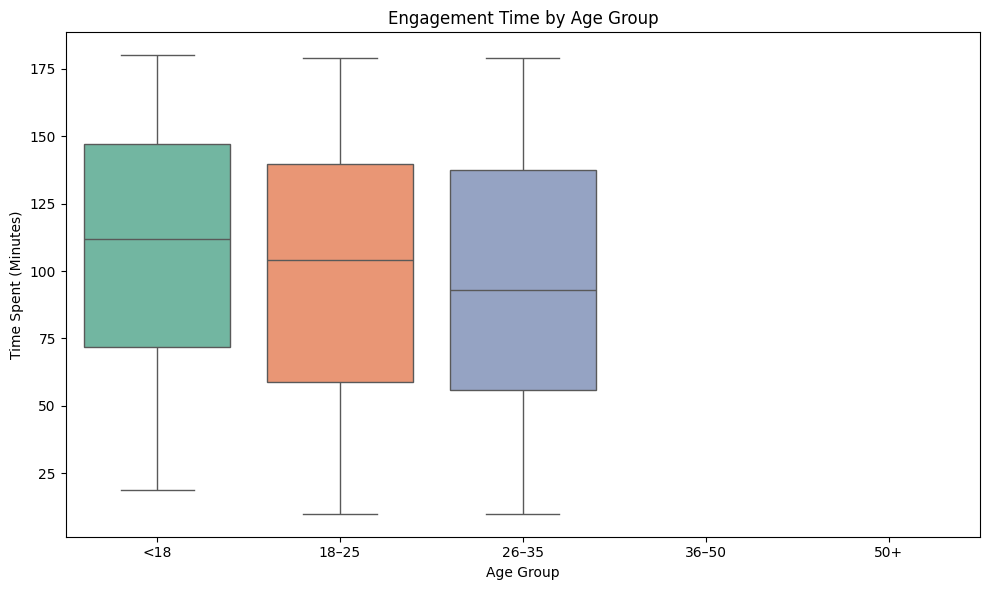

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Time_Spent_Minutes', data=merged_df, palette='Set2')
plt.title('Engagement Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time Spent (Minutes)')
plt.tight_layout()
plt.show()


D.COMPLETION PERCENTAGE VS FEEDBACK RATING

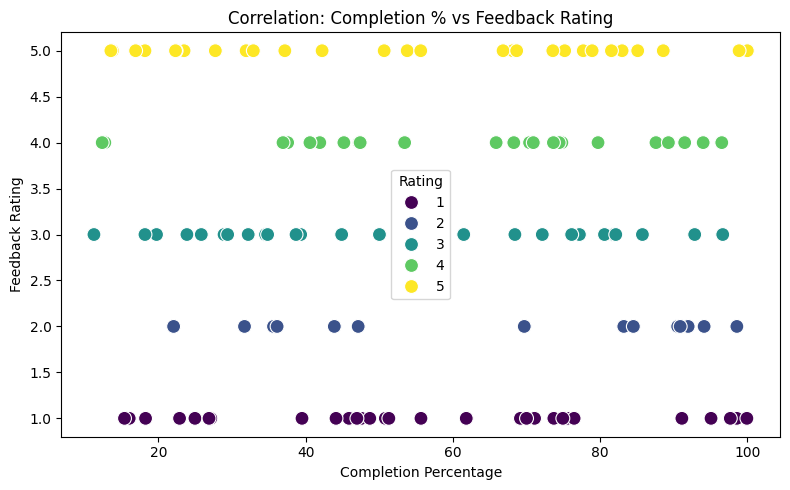

In [8]:
plt.figure(figsize=(8,5))
# Merge feedback with course activity
merged_feedback = pd.merge(feedback_df, course_df,   on=['Student_ID', 'Course_ID'], 
  how='inner')

sns.scatterplot(data=merged_feedback, x='Completion_Percentage', y='Rating', hue='Rating', palette='viridis', s=100)
plt.title("Correlation: Completion % vs Feedback Rating")
plt.xlabel("Completion Percentage")
plt.ylabel("Feedback Rating")
plt.tight_layout()
plt.show()


E.AVERAGE DAILY ENGAGEMENT TIME TREND

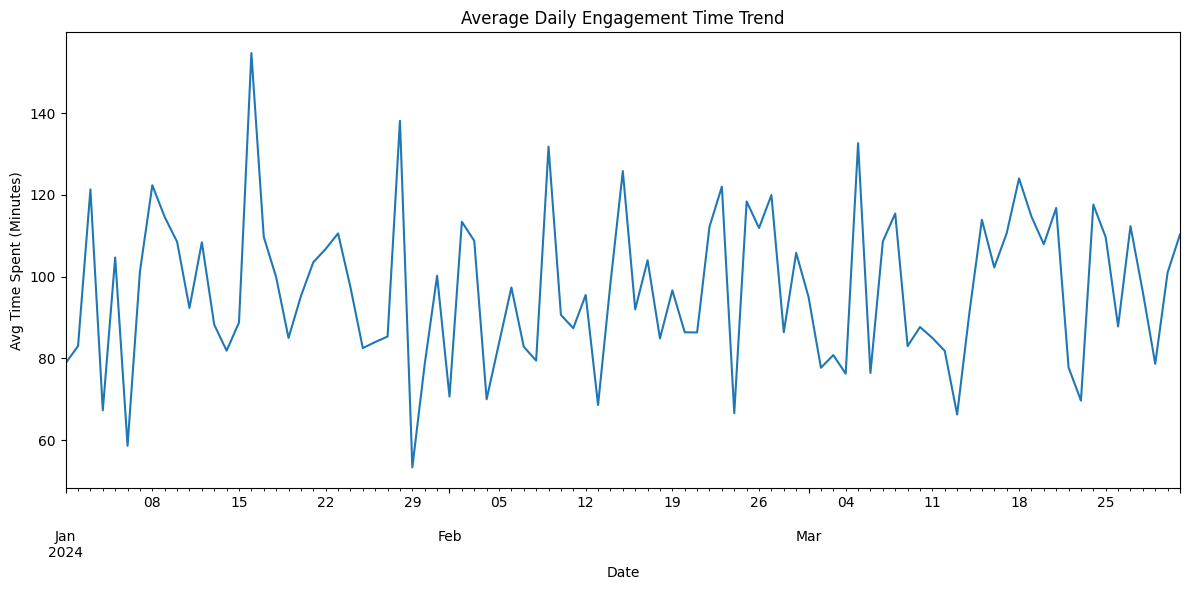

In [9]:
course_df['Date'] = pd.to_datetime(course_df['Date'], dayfirst=True)
daily_trend = course_df.groupby('Date')['Time_Spent_Minutes'].mean()

plt.figure(figsize=(12,6))
daily_trend.plot()
plt.title("Average Daily Engagement Time Trend")
plt.xlabel("Date")
plt.ylabel("Avg Time Spent (Minutes)")
plt.tight_layout()
plt.show()
